In [1]:
import pandas as pd
import json
import numpy as np
from pandas.io.json import json_normalize
import copy 
import seaborn as sns


# Data processing summary

* drop campaign - 96% missing
* drop socialEngType - 100% missing
* drop medium - (other 16% missing) - similar to channelGrouping
* clean source - drop rows with keywords listed below and dbots
  * mall.googleplex.com
  * analytics.google.com
  * bots - 60 entries only
* drop keyword 
* drop adwordsClickInfo.criteriaParameters - 100% missing 
* clean isTrueDirect - CHANGE N/A TO FALSE
* drop campaigncode, browswerversion, browswersize,operatingSystemVersion - 100% missing 
* drop mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution - 100% missing 
* drop cityId,latitude,longitude,networkLocation - 100% missing
* drop referalPath - 72% missing  
* drop adwordsClickInfo.isVideoAd 
* drop adwordsClickInfo.adNetworkType, adwordsClickInfo.slot, adwordsClickInfo.gclId, adContent - 97% missing - not relevant to revenue
* drop adwordsClickInfo.page - fillna with 0 as no interaction with ads 
* clean channelgrouping
  * label-encoding
  * one-hot-encoding
  * Groupby visitor and columns by count of each source.

In [39]:
# #def load_df(csv_path='train.csv', nrows=None):
#     JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
#     df = pd.read_csv(csv_path, 
#                      converters={column: json.loads for column in JSON_COLUMNS}, 
#                      dtype={'fullVisitorId': 'str'}, # Important!!
#                      nrows=nrows)
    
#     for column in JSON_COLUMNS:
#         column_as_df = json_normalize(df[column])
#         column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
#         df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
#     print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
#     return df

In [2]:
JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
df_train = pd.read_csv('train.csv', 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}) # Important!!

In [3]:
JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
df_test = pd.read_csv('test.csv', 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}) # Important!!

In [4]:
df_train['set'] = 'train'
df_test['set'] = 'test'

In [5]:
frames = [df_train,df_test]
df = pd.concat(frames)

In [7]:
df.tail()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,set
804679,Social,20180421,"{'browser': 'Edge', 'browserVersion': 'not ava...",9084225574121020383,"{'continent': 'Americas', 'subContinent': 'Nor...",9084225574121020383_1524358436,Not Socially Engaged,"{'visits': '1', 'hits': '33', 'pageviews': '26'}","{'referralPath': '/intl/en/yt/about/', 'campai...",1524358436,2,1524358436,test
804680,Social,20180421,"{'browser': 'Chrome', 'browserVersion': 'not a...",6146210385566305056,"{'continent': 'Americas', 'subContinent': 'Sou...",6146210385566305056_1524317728,Not Socially Engaged,"{'visits': '1', 'hits': '36', 'pageviews': '34...","{'referralPath': '/yt/lineups/es/index.html', ...",1524317728,1,1524317728,test
804681,Social,20180421,"{'browser': 'Safari (in-app)', 'browserVersion...",7484543584006767361,"{'continent': 'Americas', 'subContinent': 'Nor...",7484543584006767361_1524364725,Not Socially Engaged,"{'visits': '1', 'hits': '53', 'pageviews': '35...","{'referralPath': '/', 'campaign': '(not set)',...",1524364725,1,1524364725,test
804682,Social,20180421,"{'browser': 'Samsung Internet', 'browserVersio...",2915966035609674201,"{'continent': 'Europe', 'subContinent': 'North...",2915966035609674201_1524330416,Not Socially Engaged,"{'visits': '1', 'hits': '58', 'pageviews': '34...","{'referralPath': '/yt/about/policies/', 'campa...",1524330416,1,1524330416,test
804683,Social,20180421,"{'browser': 'MRCHROME', 'browserVersion': 'not...",5334918847827785763,"{'continent': 'Europe', 'subContinent': 'Easte...",5334918847827785763_1524301572,Not Socially Engaged,"{'visits': '1', 'hits': '71', 'pageviews': '38...","{'referralPath': '/yt/music/ru/index.html', 'c...",1524301572,1,1524301572,test


In [8]:
devices_flatten = json_normalize(df['device'])

In [9]:
geoNetwork_flatten = json_normalize(df['geoNetwork'])

In [10]:
totals_flatten = json_normalize(df['totals'])

In [11]:
trafficSource_flatten = json_normalize(df['trafficSource'])

In [12]:
trafficSource_flatten.head()

,campaign,source,medium,keyword,adwordsClickInfo.criteriaParameters,isTrueDirect,referralPath,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,adContent,campaignCode
0,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(not set),google,organic,google + online,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(not set),google,organic,(not provided),not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df = df.merge(trafficSource_flatten, right_index=True, left_index = True)

In [14]:
df = df.merge(devices_flatten, right_index=True, left_index = True)
df = df.merge(geoNetwork_flatten, right_index=True, left_index = True)
df = df.merge(totals_flatten, right_index=True, left_index = True)

In [15]:
JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
df = df.drop(JSON_COLUMNS, axis = 1)

In [54]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,set,campaign,source,medium,keyword,adwordsClickInfo.criteriaParameters,isTrueDirect,referralPath,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,adContent,campaignCode,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,"{'browser': 'Chrome', 'browserVersion': 'not a...",1131660440785968503,"{'continent': 'Asia', 'subContinent': 'Western...",1131660440785968503_1472830385,Not Socially Engaged,"{'visits': '1', 'hits': '1', 'pageviews': '1',...","{'campaign': '(not set)', 'source': 'google', ...",1472830385,1,1472830385,train,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN
0,Organic Search,20171016,"{'browser': 'Chrome', 'browserVersion': 'not a...",6167871330617112363,"{'continent': 'Asia', 'subContinent': 'Southea...",6167871330617112363_1508151024,Not Socially Engaged,"{'visits': '1', 'hits': '4', 'pageviews': '4'}","{'campaign': '(not set)', 'source': 'google', ...",1508151024,2,1508151024,test,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN
1,Organic Search,20160902,"{'browser': 'Firefox', 'browserVersion': 'not ...",377306020877927890,"{'continent': 'Oceania', 'subContinent': 'Aust...",377306020877927890_1472880147,Not Socially Engaged,"{'visits': '1', 'hits': '1', 'pageviews': '1',...","{'campaign': '(not set)', 'source': 'google', ...",1472880147,1,1472880147,train,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN
1,Organic Search,20171016,"{'browser': 'Chrome', 'brow

In [55]:
devices_flatten.shape[1]+trafficSource_flatten.shape[1]+geoNetwork_flatten.shape[1]+totals_flatten.shape[1]+12

59

In [57]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,set,campaign,source,medium,keyword,adwordsClickInfo.criteriaParameters,isTrueDirect,referralPath,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,adContent,campaignCode,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,train,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN
0,Organic Search,20171016,6167871330617112363,6167871330617112363_1508151024,Not Socially Engaged,1508151024,2,1508151024,test,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,train,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN
1,Organic Search,20171016,0643697640977915618,0643697640977915618_1508175522,Not Socially Engaged,1508175522,1,1508175522,test,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset

In [16]:
df.to_csv('all_flatten_data.csv')

## Read in flatten_Data

In [33]:
raw = pd.read_csv('all_flatten_data.csv')
pd.set_option("display.max_columns",None)

/Users/jiahui/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
#df = copy.deepcopy(raw)
#df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head(2)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,set,campaign,...,networkDomain,latitude,longitude,networkLocation,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,train,(not set),...,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN
0,Organic Search,20171016,6167871330617112363,6167871330617112363_1508151024,Not Socially Engaged,1508151024,2,1508151024,test,(not set),...,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN


### Train set: 
We have 903,653 sessions, 723,803 unique visitors. Within it, 11,515 records has transactions which include 10,114 (87%) unique visitors.

### Total:
We have 1,708,337 sessions, 1,323,730 unique visitors. 

In [18]:
df.shape

(1708337, 56)

In [19]:
np.count_nonzero(df.fullVisitorId.unique())

1323730

In [63]:
#11515 rows has transactions
has_transactions = df.loc[df.transactionRevenue.notnull()]
has_transactions.count()

channelGrouping                        21758
date                                   21758
fullVisitorId                          21758
sessionId                              21758
socialEngagementType                   21758
visitId                                21758
visitNumber                            21758
visitStartTime                         21758
set                                    21758
campaign                               21758
source                                 21758
medium                                 21758
keyword                                 7282
adwordsClickInfo.criteriaParameters    21758
isTrueDirect                           13235
referralPath                           10271
adwordsClickInfo.page                    854
adwordsClickInfo.slot                    854
adwordsClickInfo.gclId                   858
adwordsClickInfo.adNetworkType           854
adwordsClickInfo.isVideoAd               854
adContent                                262
campaignCo

In [64]:
np.count_nonzero(has_transactions.fullVisitorId.unique())

20409

In [27]:
##import math
##math.log(599950000)

20.21235687637467

In [20]:
a = pd.Categorical(df['source'])
a.unique

<bound method Categorical.unique of [google, google, google, google, google, ..., youtube.com, youtube.com, youtube.com, facebook.com, youtube.com]
Length: 1708337
Categories (380, object): [(direct), (not set), 0.muppet1.frontend.gws.muppet-exp.ij-q.borg.go..., 0.shared.bow.cat2.ads-bow.lf.borg.google.com:9817, ..., yahoo.com, yandex, youtube.com, yt-go-12345.googleplex.com]>

In [65]:
df.dtypes
a = pd.Categorical(df['medium'])
a.unique

<bound method Categorical.unique of [organic, organic, organic, organic, organic, ..., referral, referral, referral, referral, referral]
Length: 1708337
Categories (7, object): [(none), (not set), affiliate, cpc, cpm, organic, referral]>

In [107]:
df.dtypes

channelGrouping        object
date                   object
fullVisitorId          object
visitId                 int64
visitNumber             int64
visitStartTime          int64
set                    object
source                 object
medium                 object
isTrueDirect           object
referralPath           object
campaignCode           object
browser                object
browserVersion         object
operatingSystem        object
isMobile                 bool
deviceCategory         object
continent              object
subContinent           object
country                object
region                 object
metro                  object
city                   object
networkDomain          object
hits                  float64
pageviews             float64
bounces               float64
newVisits             float64
transactionRevenue    float64
fake_traffic            int64
ctadwords               int64
browser_new            object
weekdays               object
visit_hour

## Convert "string" variables to float

In [105]:
str_float = ['hits','pageviews', 'bounces', 'newVisits', 'transactionRevenue']

def to_float(data, str_float):
    for i in str_float:
        data[i] = data[i].astype(float)
        #return df
        

In [106]:
to_float(df, str_float)

### To see the unique levels of data, if the data only have one level then delete it

In [69]:
dct = {i: df[i].unique() for i in df.columns}

In [ ]:
#dct 
# SINGLE LEVEL CATEGPRICALS: 'socialEngagementType', 'adwordsClickInfo.criteriaParameters', 'browserVersion',
#  'browserSize', 'operatingSystemVersion', 'mobileDeviceBranding','mobileInputSelector', 'mobileDeviceInfo',
#'mobileDeviceMarketingName', 'flashVersion','language','screenColors','screenResolution', 'cityId','latitude',
#'longitude','networkLocation','visits','isTrueDirect',

#'adwordsClickInfo.gclId' means have interaction with ads, thinking to creat a dummy; 'adContent': create bigger 
# categories: display, keywords

#############$$$$$$$$$$$$$$$$$$$$$$$$$$$################################

# 'visitNumber': how many visits this user has? check with count()
# 'visitStartTime'
#'campaign' = adwords campaign yes



### fake_traffic more browser = ['Mozilla Compatible Agent','Mozilla'] ??

# CREATE:
# if ['campaign.isna','adwordsClickInfo.gclId'] = Flase 1,0

# 'browser'['Chrome', 'Firefox','Internet Explorer', 'Safari','Safari (in-app)','Edge','other']
# 'visitStartTime'-'date' if transaction is >0 

# groupby(sum()'visits',avg()'hits',avg()'pageviews',sum()'bounces',sum()'newVisits',sum()'transactionRevenue',avg()'transactionRevenue')

# dummy_cols = ['channelGrouping','medium','isTrueDirect','deviceCategory','browser'**,'continent']

# FUTURE:
# keyword

In [97]:
df.groupby('browser').transactionRevenue.count()

browser
(not set)                                          0
0                                                  0
ADM                                                0
Amazon Silk                                        2
Android Browser                                    0
Android Runtime                                    0
Android Webview                                   11
Apple-iPhone7C2                                    0
BlackBerry                                         0
CSM Click                                          0
Changa 99695759                                    0
Chrome                                         19586
Coc Coc                                            0
DASH_JR_3G                                         0
DoCoMo                                             0
Edge                                             106
Firefox                                          354
HTC802t_TD                                         0
Hisense M20-M_LTE                     

In [72]:
# tackle it back for more insights
#df['bounces'] = raw['bounces']
#df['newVisits'] = raw['newVisits']
pd.set_option('display.max_rows',99)
df.groupby(['bounces','browser']).newVisits.count()

bounces  browser                   
1.0      (not set)                          9
         0                                 14
         Amazon Silk                      391
         Android Browser                  603
         Android Runtime                    3
         Android Webview                 7427
         Apple-iPhone7C2                   18
         BlackBerry                       238
         CSM Click                          1
         Changa 99695759                    2
         Chrome                        427278
         Coc Coc                          955
         DASH_JR_3G                         0
         Edge                            9309
         Firefox                        37211
         Hisense M20-M_LTE                  2
         Internet Explorer              20805
         Iron                              33
         Konqueror                          2
         LYF_LS_4002_11                     2
         LYF_LS_4002_12                     

In [ ]:
#create a sample for easy review
#sample_df = df.head(500)
#sample_df.to_csv('sample_flatten.csv')

In [ ]:
#extra drops: 'browserVersion','TrueDirect','campaigncode','browserversion','socialEngType'

In [23]:
drop_columns = ['socialEngagementType', 'campaign','keyword','adwordsClickInfo.criteriaParameters','adwordsClickInfo.criteriaParameters',
                'browserSize', 'operatingSystemVersion', 'mobileDeviceBranding','mobileInputSelector', 'mobileDeviceInfo',
                'mobileDeviceMarketingName', 'flashVersion','language','screenColors','screenResolution', 'cityId','latitude',
                'longitude','networkLocation','visits','sessionId','adwordsClickInfo.isVideoAd','mobileDeviceModel','adwordsClickInfo.adNetworkType', 
                'adwordsClickInfo.slot', 'adContent','adwordsClickInfo.page'
               ]

In [24]:
df.drop(drop_columns, axis = 1, inplace = True)

In [25]:
df.shape

(1708337, 29)

In [26]:
df['newVisits'].fillna(0,inplace=True)
df['bounces'].fillna(0,inplace=True)
df.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,set,source,medium,isTrueDirect,...,country,region,metro,city,networkDomain,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,1131660440785968503,1472830385,1,1472830385,train,google,organic,NaN,...,Turkey,Izmir,(not set),Izmir,ttnet.com.tr,1,1,1,1,NaN
0,Organic Search,20171016,6167871330617112363,1508151024,2,1508151024,test,google,organic,NaN,...,Turkey,Izmir,(not set),Izmir,ttnet.com.tr,1,1,1,1,NaN
1,Organic Search,20160902,377306020877927890,1472880147,1,1472880147,train,google,organic,NaN,...,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,1,1,1,1,NaN
1,Organic Search,20171016,0643697640977915618,1508175522,1,1508175522,test,google,organic,NaN,...,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,1,1,1,1,NaN
2,Organic Search,20160902,3895546263509774583,1472865386,1,1472865386,train,google,organic,NaN,...,Spain,Community of Madrid,(not set),Madrid,unknown.unknown,1,1,1,1,NaN


### Sessions that have sourse including "analytics.google.com", 'gist.github.com' are the testing sessions, create a fake_session indicator.

In [29]:
#source from GA doesn't have transactions
fake_source = ['analytics','github','online-metrics.com','lunametrics.com','optimize.google.com','productforums.google.com',
              'adwords.google.com','sandbox.google.com','corp.google.com','google.cl','datastudio.google.com','marketingland.com',
              'adwords-displayads.googleusercontent.com','localhost','business.facebook.com','adwords-next-devel.qa.adz.google.com',
              'borg.google']

# total = 0
# count = 0
# for i in fake_source:
#     if df.source.str.contains(i).count() > 0:
#         count += df[df.source.str.contains(i)].count()[1]
#         total += df[df.source.str.contains(i)].transactionRevenue.sum() 
# print(total)
# print(count)
        #df[df.source.str.contains('analytics')].transactionRevenue.sum()

In [28]:
import math
math.log(89580000.0)

18.310642638743428

In [30]:
# create a column for fake traffic
df['fake_traffic'] = 0

In [31]:
for i in fake_source:
    df.loc[df.source.str.contains(i),'fake_traffic'] = 1 
    
df.loc[df['fake_traffic'] ==1].count()[1]

33771

In [82]:
df.shape

(1708337, 30)

### After filtering the fake source, we found we have 33,771 fake sessions that comes from web developement, google internal or third party tracking tool.

In [83]:
#df = df.set_index('fullVisitorId')
df.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,set,source,medium,isTrueDirect,referralPath,campaignCode,browser,browserVersion,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,hits,pageviews,bounces,newVisits,transactionRevenue,fake_traffic
0,Organic Search,20160902,1131660440785968503,1472830385,1,1472830385,train,google,organic,NaN,NaN,NaN,Chrome,not available in demo dataset,Windows,False,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,ttnet.com.tr,1,1.0,1.0,1.0,NaN,0
1,Organic Search,20171016,6167871330617112363,1508151024,2,1508151024,test,google,organic,NaN,NaN,NaN,Chrome,not available in demo dataset,Windows,False,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,ttnet.com.tr,1,1.0,1.0,1.0,NaN,0
2,Organic Search,20160902,377306020877927890,1472880147,1,1472880147,train,google,organic,NaN,NaN,NaN,Firefox,not available in demo dataset,Macintosh,False,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,1,1.0,1.0,1.0,NaN,0
3,Organic Search,20171016,643697640977915618,1508175522,1,1508175522,test,google,organic,NaN,NaN,NaN,Firefox,not available in demo dataset,Macintosh,False,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,1,1.0,1.0,1.0,NaN,0
4,Organic Search,20160902,3895546263509774583,1472865386,1,1472865386,train,google,organic,NaN,NaN,NaN,Chrome,not available in demo dataset,Windows,False,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,unknown.unknown,1,1.0,1.0,1.0,NaN,0


### Create campaign indicator by glickid, and count how many times this gclickid came to the store

In [71]:
#if ['adwordsClickInfo.gclId'] = Flase 1,0
#df['adwordsClickInfo.gclId'] = raw['adwordsClickInfo.gclId']

In [72]:
df['ctadwords'] = 0
df.loc[~df['adwordsClickInfo.gclId'].isna(),'ctadwords'] = 1

In [76]:
df[df.ctadwords == 1].head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,set,source,medium,isTrueDirect,referralPath,campaignCode,browser,browserVersion,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,hits,pageviews,bounces,newVisits,transactionRevenue,fake_traffic,ctadwords,adwordsClickInfo.gclId
204,Affiliates,20160902,2903318777294784357,1472826827,1,1472826827,train,Partners,affiliate,NaN,NaN,NaN,Chrome,not available in demo dataset,Windows,False,desktop,Europe,Eastern Europe,Russia,not available in demo dataset,not available in demo dataset,not available in demo dataset,itcom-tula.ru,1,1,1,1,NaN,0,1,Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRBVDYwnFaw...
204,Organic Search,20171016,7998039051638733661,1508174789,10,1508174789,test,Partners,affiliate,NaN,NaN,NaN,Chrome,not available in demo dataset,Windows,False,desktop,Europe,Eastern Europe,Russia,not available in demo dataset,not available in demo dataset,not available in demo dataset,itcom-tula.ru,1,1,1,1,NaN,0,1,Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRBVDYwnFaw...
205,Affiliates,20160902,8094671042653767256,1472807005,1,1472807005,train,Partners,affiliate,NaN,NaN,NaN,Safari,not available in demo dataset,iOS,True,tablet,Oceania,Australasia,Australia,Queensland,(not set),Brisbane,comindico.com.au,1,1,1,1,NaN,0,1,Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRBVDYwnFaw...
205,Organic Search,20171016,436559266546047609,1508191674,1,1508191674,test,Partners,affiliate,NaN,NaN,NaN,Safari,not available in demo dataset,iOS,True,tablet,Oceania,Australasia,Australia,Queensland,(not set),Brisbane,comindico.com.au,1,1,1,1,NaN,0,1,Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRBVDYwnFaw...
542,Organic Search,20160902,1611453642221139587,1472877064,1,1472877064,train,google,organic,NaN,NaN,NaN,Chrome,not available in demo dataset,Windows,False,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Santa Clara,(not set),6,5,0,1,NaN,0,1,Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRAq0D2zir1...


In [77]:
df.drop('adwordsClickInfo.gclId', axis = 1, inplace = True)

In [78]:
df.shape

(1708337, 31)

### Create browser types, merge into 6 categories ['Chrome', 'Firefox','Internet Explorer', 'Safari'&'Safari (in-app)','Edge','other']

In [ ]:
#'browser'['Chrome', 'Firefox','Internet Explorer', 'Safari','Safari (in-app)','Edge','other']

In [79]:
df['browser_new'] = 'other'
for i in ['Chrome', 'Firefox','Internet Explorer', 'Safari','Safari (in-app)','Edge']:
    df.loc[df['browser'] == i,'browser_new'] = i

Change NaN Values in isTrueDirect to FALSE

In [80]:
df['isTrueDirect'].fillna('FALSE', inplace=True)

In [81]:
df.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,set,source,medium,isTrueDirect,referralPath,campaignCode,browser,browserVersion,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,hits,pageviews,bounces,newVisits,transactionRevenue,fake_traffic,ctadwords,browser_new
0,Organic Search,20160902,1131660440785968503,1472830385,1,1472830385,train,google,organic,FALSE,NaN,NaN,Chrome,not available in demo dataset,Windows,False,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,ttnet.com.tr,1,1,1,1,NaN,0,0,Chrome
0,Organic Search,20171016,6167871330617112363,1508151024,2,1508151024,test,google,organic,FALSE,NaN,NaN,Chrome,not available in demo dataset,Windows,False,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,ttnet.com.tr,1,1,1,1,NaN,0,0,Chrome
1,Organic Search,20160902,377306020877927890,1472880147,1,1472880147,train,google,organic,FALSE,NaN,NaN,Firefox,not available in demo dataset,Macintosh,False,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,1,1,1,1,NaN,0,0,Firefox
1,Organic Search,20171016,0643697640977915618,1508175522,1,1508175522,test,google,organic,FALSE,NaN,NaN,Firefox,not available in demo dataset,Macintosh,False,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,1,1,1,1,NaN,0,0,Firefox
2,Organic Search,20160902,3895546263509774583,1472865386,1,1472865386,train,google,organic,FALSE,NaN,NaN,Chrome,not available in demo dataset,Windows,False,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,unknown.unknown,1,1,1,1,NaN,0,0,Chrome


In [82]:
df['date'] = df['date'].astype(str)

### Get visit times by weekdays and hours, but be aware of the hour might be local or user's hour

In [83]:
import datetime
df['weekdays'] = [datetime.datetime.strptime(i, '%Y%m%d').strftime('%A') for i in df['date'].values]
df['weekdays'].unique()

array(['Friday', 'Monday', 'Thursday', 'Sunday', 'Saturday', 'Tuesday',
       'Wednesday'], dtype=object)

In [85]:
df['visit_hour'] = [datetime.datetime.fromtimestamp(i).hour for i in df.visitStartTime]

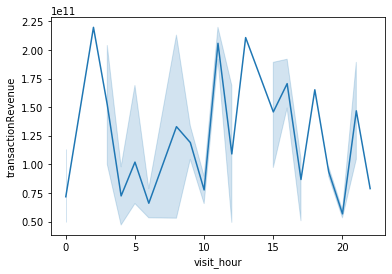

In [109]:
# to see if any hour peaks for sales
sns.lineplot(df['visit_hour'], df.groupby('visit_hour').transactionRevenue.sum())

In [112]:
df.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,set,source,medium,isTrueDirect,referralPath,campaignCode,browser,browserVersion,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,hits,pageviews,bounces,newVisits,transactionRevenue,fake_traffic,browser_new,weekdays,visit_hour
0,Organic Search,20160902,1131660440785968503,1472830385,1,1472830385,train,google,organic,FALSE,NaN,NaN,Chrome,not available in demo dataset,Windows,False,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,ttnet.com.tr,1,1.0,1.0,1.0,NaN,0,Chrome,Friday,10
1,Organic Search,20171016,6167871330617112363,1508151024,2,1508151024,test,google,organic,FALSE,NaN,NaN,Chrome,not available in demo dataset,Windows,False,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,ttnet.com.tr,1,1.0,1.0,1.0,NaN,0,Chrome,Monday,5
2,Organic Search,20160902,377306020877927890,1472880147,1,1472880147,train,google,organic,FALSE,NaN,NaN,Firefox,not available in demo dataset,Macintosh,False,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,1,1.0,1.0,1.0,NaN,0,Firefox,Friday,0
3,Organic Search,20171016,643697640977915618,1508175522,1,1508175522,test,google,organic,FALSE,NaN,NaN,Firefox,not available in demo dataset,Macintosh,False,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,1,1.0,1.0,1.0,NaN,0,Firefox,Monday,12
4,Organic Search,20160902,3895546263509774583,1472865386,1,1472865386,train,google,organic,FALSE,NaN,NaN,Chrome,not available in demo dataset,Windows,False,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,unknown.unknown,1,1.0,1.0,1.0,NaN,0,Chrome,Friday,20


### Create dummy columns, the dummy base is in the dummy_base list

In [110]:
dummy_cols = ['channelGrouping','isTrueDirect','deviceCategory','browser_new','subContinent','operatingSystem',
             'isMobile','weekdays','visit_hour']
not_dropfirst_cols = set(pd.get_dummies(data=df, columns=dummy_cols).columns)
dropfirst_cols = set(pd.get_dummies(data=df, columns=dummy_cols, drop_first = True).columns)
dummy_base = not_dropfirst_cols.difference(dropfirst_cols)

In [111]:
dummy_base

{'browser_new_Chrome',
 'channelGrouping_(Other)',
 'deviceCategory_desktop',
 'isMobile_False',
 'isTrueDirect_True',
 'operatingSystem_(not set)',
 'subContinent_(not set)',
 'visit_hour_0',
 'weekdays_Friday'}

### Drop the extra columns

In [113]:
drop_cols = ['visitStartTime','source','medium','referralPath',
             'campaignCode','browser','browserVersion','continent',
             'country','region','metro','city','networkDomain',]
#left date, visitId 
#df_dummies.drop(drop_cols, axis = 1, inplace = True)

In [123]:
df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'visitId', 'visitNumber',
       'visitStartTime', 'set', 'source', 'medium', 'isTrueDirect',
       'referralPath', 'campaignCode', 'browser', 'browserVersion',
       'operatingSystem', 'isMobile', 'deviceCategory', 'continent',
       'subContinent', 'country', 'region', 'metro', 'city', 'networkDomain',
       'hits', 'pageviews', 'bounces', 'newVisits', 'transactionRevenue',
       'fake_traffic', 'ctadwords', 'browser_new', 'weekdays', 'visit_hour'],
      dtype='object')

In [124]:
df.head(2)

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,set,source,medium,isTrueDirect,referralPath,campaignCode,browser,browserVersion,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,hits,pageviews,bounces,newVisits,transactionRevenue,fake_traffic,ctadwords,browser_new,weekdays,visit_hour
0,Organic Search,20160902,1131660440785968503,1472830385,1,1472830385,train,google,organic,FALSE,NaN,NaN,Chrome,not available in demo dataset,Windows,False,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,ttnet.com.tr,1.0,1.0,1.0,1.0,NaN,0,0,Chrome,Friday,10
0,Organic Search,20171016,6167871330617112363,1508151024,2,1508151024,test,google,organic,FALSE,NaN,NaN,Chrome,not available in demo dataset,Windows,False,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,ttnet.com.tr,1.0,1.0,1.0,1.0,NaN,0,0,Chrome,Monday,5


In [127]:
drop_cols = ['date','visitId','visitStartTime','medium','referralPath','campaignCode','browser', 'browserVersion',
            'continent','country', 'region', 'metro', 'city', 'networkDomain']
df.drop(drop_cols, axis = 1, inplace = True)

In [128]:
df.columns

Index(['channelGrouping', 'fullVisitorId', 'visitNumber', 'set', 'source',
       'isTrueDirect', 'operatingSystem', 'isMobile', 'deviceCategory',
       'subContinent', 'hits', 'pageviews', 'bounces', 'newVisits',
       'transactionRevenue', 'fake_traffic', 'ctadwords', 'browser_new',
       'weekdays', 'visit_hour'],
      dtype='object')

In [129]:
df_dummies = pd.get_dummies(data=df, columns=dummy_cols, drop_first = True)

In [132]:
df_dummies.head(2)

,fullVisitorId,visitNumber,set,source,hits,pageviews,bounces,newVisits,transactionRevenue,fake_traffic,ctadwords,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,isTrueDirect_FALSE,deviceCategory_mobile,deviceCategory_tablet,browser_new_Edge,browser_new_Firefox,browser_new_Internet Explorer,browser_new_Safari,browser_new_Safari (in-app),browser_new_other,subContinent_Australasia,subContinent_Caribbean,subContinent_Central America,subContinent_Central Asia,subContinent_Eastern Africa,subContinent_Eastern Asia,subContinent_Eastern Europe,subContinent_Melanesia,subContinent_Micronesian Region,subContinent_Middle Africa,subContinent_Northern Africa,subContinent_Northern America,subContinent_Northern Europe,subContinent_Polynesia,subContinent_South America,subContinent_Southeast Asia,subContinent_Southern Africa,subContinent_Southern Asia,subContinent_Southern Europe,subContinent_Western Africa,subContinent_Western Asia,subContinent_Western Europe,operatingSystem_Android,operatingSystem_BlackBerry,operatingSystem_Chrome OS,operatingSystem_Firefox OS,operatingSystem_FreeBSD,operatingSystem_Linux,operatingSystem_Macintosh,operatingSystem_NTT DoCoMo,operatingSystem_Nintendo 3DS,operatingSystem_Nintendo Wii,operatingSystem_Nintendo WiiU,operatingSystem_Nokia,operatingSystem_OpenBSD,operatingSystem_Samsung,operatingSystem_SunOS,operatingSystem_Windows,operatingSystem_Windows Phone,operatingSystem_Xbox,operatingSystem_iOS,isMobile_True,weekdays_Monday,weekdays_Saturday,weekdays_Sunday,weekdays_Thursday,weekdays_Tuesday,weekdays_Wednesday,visit_hour_1,visit_hour_2,visit_hour_3,visit_hour_4,visit_hour_5,visit_hour_6,visit_hour_7,visit_hour_8,visit_hour_9,visit_hour_10,visit_hour_11,visit_hour_12,visit_hour_13,visit_hour_14,visit_hour_15,visit_hour_16,visit_hour_17,visit_hour_18,visit_hour_19,visit_hour_20,visit_hour_21,visit_hour_22,visit_hour_23
0,1131660440785968503,1,train,google,1.0,1.0,1.0,1.0,NaN,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
0,6167871330617112363,2,test,google,1.0,1.0,1.0,1.0,NaN,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [133]:
df_dummies.columns

Index(['fullVisitorId', 'visitNumber', 'set', 'source', 'hits', 'pageviews',
       'bounces', 'newVisits', 'transactionRevenue', 'fake_traffic',
       'ctadwords', 'channelGrouping_Affiliates', 'channelGrouping_Direct',
       'channelGrouping_Display', 'channelGrouping_Organic Search',
       'channelGrouping_Paid Search', 'channelGrouping_Referral',
       'channelGrouping_Social', 'isTrueDirect_FALSE', 'deviceCategory_mobile',
       'deviceCategory_tablet', 'browser_new_Edge', 'browser_new_Firefox',
       'browser_new_Internet Explorer', 'browser_new_Safari',
       'browser_new_Safari (in-app)', 'browser_new_other',
       'subContinent_Australasia', 'subContinent_Caribbean',
       'subContinent_Central America', 'subContinent_Central Asia',
       'subContinent_Eastern Africa', 'subContinent_Eastern Asia',
       'subContinent_Eastern Europe', 'subContinent_Melanesia',
       'subContinent_Micronesian Region', 'subContinent_Middle Africa',
       'subContinent_Northern Africa

In [134]:
df_dummies.head()

,fullVisitorId,visitNumber,set,source,hits,pageviews,bounces,newVisits,transactionRevenue,fake_traffic,ctadwords,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,isTrueDirect_FALSE,deviceCategory_mobile,deviceCategory_tablet,browser_new_Edge,browser_new_Firefox,browser_new_Internet Explorer,browser_new_Safari,browser_new_Safari (in-app),browser_new_other,subContinent_Australasia,subContinent_Caribbean,subContinent_Central America,subContinent_Central Asia,subContinent_Eastern Africa,subContinent_Eastern Asia,subContinent_Eastern Europe,subContinent_Melanesia,subContinent_Micronesian Region,subContinent_Middle Africa,subContinent_Northern Africa,subContinent_Northern America,subContinent_Northern Europe,subContinent_Polynesia,subContinent_South America,subContinent_Southeast Asia,subContinent_Southern Africa,subContinent_Southern Asia,subContinent_Southern Europe,subContinent_Western Africa,subContinent_Western Asia,subContinent_Western Europe,operatingSystem_Android,operatingSystem_BlackBerry,operatingSystem_Chrome OS,operatingSystem_Firefox OS,operatingSystem_FreeBSD,operatingSystem_Linux,operatingSystem_Macintosh,operatingSystem_NTT DoCoMo,operatingSystem_Nintendo 3DS,operatingSystem_Nintendo Wii,operatingSystem_Nintendo WiiU,operatingSystem_Nokia,operatingSystem_OpenBSD,operatingSystem_Samsung,operatingSystem_SunOS,operatingSystem_Windows,operatingSystem_Windows Phone,operatingSystem_Xbox,operatingSystem_iOS,isMobile_True,weekdays_Monday,weekdays_Saturday,weekdays_Sunday,weekdays_Thursday,weekdays_Tuesday,weekdays_Wednesday,visit_hour_1,visit_hour_2,visit_hour_3,visit_hour_4,visit_hour_5,visit_hour_6,visit_hour_7,visit_hour_8,visit_hour_9,visit_hour_10,visit_hour_11,visit_hour_12,visit_hour_13,visit_hour_14,visit_hour_15,visit_hour_16,visit_hour_17,visit_hour_18,visit_hour_19,visit_hour_20,visit_hour_21,visit_hour_22,visit_hour_23
0,1131660440785968503,1,train,google,1.0,1.0,1.0,1.0,NaN,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
0,6167871330617112363,2,test,google,1.0,1.0,1.0,1.0,NaN,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,377306020877927890,1,train,google,1.0,1.0,1.0,1.0,NaN,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0643697640977915618,1,test,google,1.0,1.0,1.0,1.0,NaN,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3895546263509774583,1,train,google,1.0,1.0,1.0,1.0,NaN,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Final senity check, to fill the na pageviews with mode and fills transactionRevenue na with 1

In [144]:
[print(i) for i in zip(df_dummies.columns,[round(df_dummies[j].isna().sum()/1708337*100,2) for j in df_dummies.columns])]

('fullVisitorId', 0.0)
('visitNumber', 0.0)
('set', 0.0)
('source', 0.0)
('hits', 0.0)
('pageviews', 0.01)
('bounces', 0.0)
('newVisits', 0.0)
('transactionRevenue', 98.73)
('fake_traffic', 0.0)
('ctadwords', 0.0)
('channelGrouping_Affiliates', 0.0)
('channelGrouping_Direct', 0.0)
('channelGrouping_Display', 0.0)
('channelGrouping_Organic Search', 0.0)
('channelGrouping_Paid Search', 0.0)
('channelGrouping_Referral', 0.0)
('channelGrouping_Social', 0.0)
('isTrueDirect_FALSE', 0.0)
('deviceCategory_mobile', 0.0)
('deviceCategory_tablet', 0.0)
('browser_new_Edge', 0.0)
('browser_new_Firefox', 0.0)
('browser_new_Internet Explorer', 0.0)
('browser_new_Safari', 0.0)
('browser_new_Safari (in-app)', 0.0)
('browser_new_other', 0.0)
('subContinent_Australasia', 0.0)
('subContinent_Caribbean', 0.0)
('subContinent_Central America', 0.0)
('subContinent_Central Asia', 0.0)
('subContinent_Eastern Africa', 0.0)
('subContinent_Eastern Asia', 0.0)
('subContinent_Eastern Europe', 0.0)
('subContinent_Mel

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [150]:
df_dummies.pageviews.mode()

0    1.0
dtype: float64

In [151]:
#df_dummies['pageviews'] = df['pageviews']
df_dummies['pageviews'] = df_dummies['pageviews'].fillna(1)

In [152]:
#df_dummies['transactionRevenue'] = df['transactionRevenue']
df_dummies['transactionRevenue'] = df_dummies['transactionRevenue'].fillna(1)

In [153]:
[print(i) for i in zip(df_dummies.columns,[round(df_dummies[j].isna().sum()/903753*100,2) for j in df_dummies.columns])]

('fullVisitorId', 0.0)
('visitNumber', 0.0)
('set', 0.0)
('source', 0.0)
('hits', 0.0)
('pageviews', 0.0)
('bounces', 0.0)
('newVisits', 0.0)
('transactionRevenue', 0.0)
('fake_traffic', 0.0)
('ctadwords', 0.0)
('channelGrouping_Affiliates', 0.0)
('channelGrouping_Direct', 0.0)
('channelGrouping_Display', 0.0)
('channelGrouping_Organic Search', 0.0)
('channelGrouping_Paid Search', 0.0)
('channelGrouping_Referral', 0.0)
('channelGrouping_Social', 0.0)
('isTrueDirect_FALSE', 0.0)
('deviceCategory_mobile', 0.0)
('deviceCategory_tablet', 0.0)
('browser_new_Edge', 0.0)
('browser_new_Firefox', 0.0)
('browser_new_Internet Explorer', 0.0)
('browser_new_Safari', 0.0)
('browser_new_Safari (in-app)', 0.0)
('browser_new_other', 0.0)
('subContinent_Australasia', 0.0)
('subContinent_Caribbean', 0.0)
('subContinent_Central America', 0.0)
('subContinent_Central Asia', 0.0)
('subContinent_Eastern Africa', 0.0)
('subContinent_Eastern Asia', 0.0)
('subContinent_Eastern Europe', 0.0)
('subContinent_Melane

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [154]:
df_dummies[df_dummies.transactionRevenue==0]

,fullVisitorId,visitNumber,set,source,hits,pageviews,bounces,newVisits,transactionRevenue,fake_traffic,ctadwords,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,isTrueDirect_FALSE,deviceCategory_mobile,deviceCategory_tablet,browser_new_Edge,browser_new_Firefox,browser_new_Internet Explorer,browser_new_Safari,browser_new_Safari (in-app),browser_new_other,subContinent_Australasia,subContinent_Caribbean,subContinent_Central America,subContinent_Central Asia,subContinent_Eastern Africa,subContinent_Eastern Asia,subContinent_Eastern Europe,subContinent_Melanesia,subContinent_Micronesian Region,subContinent_Middle Africa,subContinent_Northern Africa,subContinent_Northern America,subContinent_Northern Europe,subContinent_Polynesia,subContinent_South America,subContinent_Southeast Asia,subContinent_Southern Africa,subContinent_Southern Asia,subContinent_Southern Europe,subContinent_Western Africa,subContinent_Western Asia,subContinent_Western Europe,operatingSystem_Android,operatingSystem_BlackBerry,operatingSystem_Chrome OS,operatingSystem_Firefox OS,operatingSystem_FreeBSD,operatingSystem_Linux,operatingSystem_Macintosh,operatingSystem_NTT DoCoMo,operatingSystem_Nintendo 3DS,operatingSystem_Nintendo Wii,operatingSystem_Nintendo WiiU,operatingSystem_Nokia,operatingSystem_OpenBSD,operatingSystem_Samsung,operatingSystem_SunOS,operatingSystem_Windows,operatingSystem_Windows Phone,operatingSystem_Xbox,operatingSystem_iOS,isMobile_True,weekdays_Monday,weekdays_Saturday,weekdays_Sunday,weekdays_Thursday,weekdays_Tuesday,weekdays_Wednesday,visit_hour_1,visit_hour_2,visit_hour_3,visit_hour_4,visit_hour_5,visit_hour_6,visit_hour_7,visit_hour_8,visit_hour_9,visit_hour_10,visit_hour_11,visit_hour_12,visit_hour_13,visit_hour_14,visit_hour_15,visit_hour_16,visit_hour_17,visit_hour_18,visit_hour_19,visit_hour_20,visit_hour_21,visit_hour_22,visit_hour_23


In [155]:
df_dummies_train = df_dummies[df_dummies['set'] == 'train']

In [156]:
df_dummies_train.head()

,fullVisitorId,visitNumber,set,source,hits,pageviews,bounces,newVisits,transactionRevenue,fake_traffic,ctadwords,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,isTrueDirect_FALSE,deviceCategory_mobile,deviceCategory_tablet,browser_new_Edge,browser_new_Firefox,browser_new_Internet Explorer,browser_new_Safari,browser_new_Safari (in-app),browser_new_other,subContinent_Australasia,subContinent_Caribbean,subContinent_Central America,subContinent_Central Asia,subContinent_Eastern Africa,subContinent_Eastern Asia,subContinent_Eastern Europe,subContinent_Melanesia,subContinent_Micronesian Region,subContinent_Middle Africa,subContinent_Northern Africa,subContinent_Northern America,subContinent_Northern Europe,subContinent_Polynesia,subContinent_South America,subContinent_Southeast Asia,subContinent_Southern Africa,subContinent_Southern Asia,subContinent_Southern Europe,subContinent_Western Africa,subContinent_Western Asia,subContinent_Western Europe,operatingSystem_Android,operatingSystem_BlackBerry,operatingSystem_Chrome OS,operatingSystem_Firefox OS,operatingSystem_FreeBSD,operatingSystem_Linux,operatingSystem_Macintosh,operatingSystem_NTT DoCoMo,operatingSystem_Nintendo 3DS,operatingSystem_Nintendo Wii,operatingSystem_Nintendo WiiU,operatingSystem_Nokia,operatingSystem_OpenBSD,operatingSystem_Samsung,operatingSystem_SunOS,operatingSystem_Windows,operatingSystem_Windows Phone,operatingSystem_Xbox,operatingSystem_iOS,isMobile_True,weekdays_Monday,weekdays_Saturday,weekdays_Sunday,weekdays_Thursday,weekdays_Tuesday,weekdays_Wednesday,visit_hour_1,visit_hour_2,visit_hour_3,visit_hour_4,visit_hour_5,visit_hour_6,visit_hour_7,visit_hour_8,visit_hour_9,visit_hour_10,visit_hour_11,visit_hour_12,visit_hour_13,visit_hour_14,visit_hour_15,visit_hour_16,visit_hour_17,visit_hour_18,visit_hour_19,visit_hour_20,visit_hour_21,visit_hour_22,visit_hour_23
0,1131660440785968503,1,train,google,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,377306020877927890,1,train,google,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3895546263509774583,1,train,google,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4763447161404445595,1,train,google,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,27294437909732085,2,train,google,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [157]:
df_dummies_train.to_csv('dummies_train_new.csv')

In [158]:
df_dummies_test = df_dummies[df_dummies['set'] == 'test']

In [159]:
df_dummies_test.to_csv('dummies_test_new.csv')

In [160]:
df_dummies_train.shape

(903653, 98)

In [161]:
df_dummies_test.shape

(804684, 98)

In [162]:
df_dummies.shape

(1708337, 98)

In [163]:
df_train.shape

(903653, 13)

### Aggrate by visitors, ### pick out fake_traffics first for both train, test, drop before group by 

In [179]:
df_dummies.columns

Index(['fullVisitorId', 'visitNumber', 'set', 'source', 'hits', 'pageviews',
       'bounces', 'newVisits', 'transactionRevenue', 'fake_traffic',
       'ctadwords', 'channelGrouping_Affiliates', 'channelGrouping_Direct',
       'channelGrouping_Display', 'channelGrouping_Organic Search',
       'channelGrouping_Paid Search', 'channelGrouping_Referral',
       'channelGrouping_Social', 'isTrueDirect_FALSE', 'deviceCategory_mobile',
       'deviceCategory_tablet', 'browser_new_Edge', 'browser_new_Firefox',
       'browser_new_Internet Explorer', 'browser_new_Safari',
       'browser_new_Safari (in-app)', 'browser_new_other',
       'subContinent_Australasia', 'subContinent_Caribbean',
       'subContinent_Central America', 'subContinent_Central Asia',
       'subContinent_Eastern Africa', 'subContinent_Eastern Asia',
       'subContinent_Eastern Europe', 'subContinent_Melanesia',
       'subContinent_Micronesian Region', 'subContinent_Middle Africa',
       'subContinent_Northern Africa

In [170]:
df_dummies.shape

(1708337, 98)

In [645]:
df_groupby = copy.deepcopy(df_dummies)

In [182]:
#train mean colms, deselect fake_traffic before group by
df_mean_train = df_dummies_train.loc[df_dummies_train.fake_traffic == 0,['fullVisitorId','hits','pageviews']]


In [183]:
df_mean_train_agg = df_mean_train.groupby('fullVisitorId').agg(
    avg_hits = ('hits','mean'),
    avg_pageviews = ('pageviews', 'mean'))

In [198]:
df_mean_train_agg.head()

,avg_hits,avg_pageviews
fullVisitorId,,
0000010278554503158,11.0,8.0
0000020424342248747,17.0,13.0
0000027376579751715,6.0,5.0
0000039460501403861,2.0,2.0
0000040862739425590,2.5,2.5


In [184]:
df_mean_train_agg.shape

(704353, 2)

In [185]:
#test mean colms
df_mean_test = df_dummies.loc[df_dummies_train.fake_traffic == 0, ['fullVisitorId','hits','pageviews']]
                              

In [186]:
df_mean_test_agg = df_mean_test.groupby('fullVisitorId').agg(
    avg_hits = ('hits','mean'),
    avg_pageviews = ('pageviews', 'mean'))

In [187]:
df_mean_test_agg.shape

(1303558, 2)

In [194]:
### train sum, deselect fake_traffic before hand
df_sum_train = df_dummies_train.loc[df_dummies_train.fake_traffic == 0,:].drop(['visitNumber','set','source','hits','pageviews'],axis = 1)

In [195]:
df_sum_train.head()

,fullVisitorId,bounces,newVisits,transactionRevenue,fake_traffic,ctadwords,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,isTrueDirect_FALSE,deviceCategory_mobile,deviceCategory_tablet,browser_new_Edge,browser_new_Firefox,browser_new_Internet Explorer,browser_new_Safari,browser_new_Safari (in-app),browser_new_other,subContinent_Australasia,subContinent_Caribbean,subContinent_Central America,subContinent_Central Asia,subContinent_Eastern Africa,subContinent_Eastern Asia,subContinent_Eastern Europe,subContinent_Melanesia,subContinent_Micronesian Region,subContinent_Middle Africa,subContinent_Northern Africa,subContinent_Northern America,subContinent_Northern Europe,subContinent_Polynesia,subContinent_South America,subContinent_Southeast Asia,subContinent_Southern Africa,subContinent_Southern Asia,subContinent_Southern Europe,subContinent_Western Africa,subContinent_Western Asia,subContinent_Western Europe,operatingSystem_Android,operatingSystem_BlackBerry,operatingSystem_Chrome OS,operatingSystem_Firefox OS,operatingSystem_FreeBSD,operatingSystem_Linux,operatingSystem_Macintosh,operatingSystem_NTT DoCoMo,operatingSystem_Nintendo 3DS,operatingSystem_Nintendo Wii,operatingSystem_Nintendo WiiU,operatingSystem_Nokia,operatingSystem_OpenBSD,operatingSystem_Samsung,operatingSystem_SunOS,operatingSystem_Windows,operatingSystem_Windows Phone,operatingSystem_Xbox,operatingSystem_iOS,isMobile_True,weekdays_Monday,weekdays_Saturday,weekdays_Sunday,weekdays_Thursday,weekdays_Tuesday,weekdays_Wednesday,visit_hour_1,visit_hour_2,visit_hour_3,visit_hour_4,visit_hour_5,visit_hour_6,visit_hour_7,visit_hour_8,visit_hour_9,visit_hour_10,visit_hour_11,visit_hour_12,visit_hour_13,visit_hour_14,visit_hour_15,visit_hour_16,visit_hour_17,visit_hour_18,visit_hour_19,visit_hour_20,visit_hour_21,visit_hour_22,visit_hour_23
0,1131660440785968503,1.0,1.0,1.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,377306020877927890,1.0,1.0,1.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3895546263509774583,1.0,1.0,1.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4763447161404445595,1.0,1.0,1.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,27294437909732085,1.0,0.0,1.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [196]:
df_sum_train_agg = df_sum_train.groupby('fullVisitorId').sum()

In [204]:
df_sum_train_agg.shape

(704353, 92)

In [199]:
### test sum, deselect fake_traffic before hand
df_sum_test = df_dummies.loc[df_dummies.fake_traffic == 0,:].drop(['visitNumber','set','source','hits','pageviews'],axis = 1)

In [202]:
df_sum_test_agg = df_sum_test.groupby('fullVisitorId').sum()

In [205]:
df_sum_test_agg.shape

(1303558, 92)

In [208]:
### train count, deselect fake_traffic before hand
df_count_train = df_dummies_train.loc[df_dummies_train.fake_traffic == 0, ['fullVisitorId','visitNumber']]

In [209]:
df_count_train_agg = df_count_train.groupby('fullVisitorId').count()

In [215]:
df_count_train_agg.shape

(704353, 1)

In [211]:
### test count, deselect fake_traffic before hand
df_count_test = df_dummies.loc[df_dummies_train.fake_traffic == 0, ['fullVisitorId','visitNumber']]


In [212]:
df_count_test_agg = df_count_test.groupby('fullVisitorId').count()

In [216]:
df_count_test_agg.shape

(1303558, 1)

In [217]:
### join mean, sum, count for train
train_model = pd.merge(df_mean_train_agg, df_sum_train_agg, on = 'fullVisitorId')

In [221]:
train_model = pd.merge(train_model, df_count_train_agg, on = 'fullVisitorId')

In [224]:
train_model.shape

(704353, 95)

In [225]:
### join mean, sum, count for train, don't forget to change transaction = 0 and only keep ids 
### are originally in train

test_model = pd.merge(df_mean_test_agg, df_sum_test_agg, on = 'fullVisitorId')
test_model = pd.merge(test_model, df_count_test_agg, on = 'fullVisitorId')

In [228]:
test_model.shape

(1303558, 95)

In [ ]:
#mean =['hits'/totalsession,'pageviews'/totalsession,,]
# sum =['visitNumber', 'set', 'source', 
#        'bounces', 'newVisits', 'transactionRevenue', 
#        'ctadwords', 'channelGrouping_Affiliates', 'channelGrouping_Direct',
#        'channelGrouping_Display', 'channelGrouping_Organic Search',
#        'channelGrouping_Paid Search', 'channelGrouping_Referral',
#        'channelGrouping_Social', 'isTrueDirect_FALSE', 'deviceCategory_mobile',
#        'deviceCategory_tablet', 'browser_new_Edge', 'browser_new_Firefox',
#        'browser_new_Internet Explorer', 'browser_new_Safari',
#        'browser_new_Safari (in-app)', 'browser_new_other',
#        'subContinent_Australasia', 'subContinent_Caribbean',
#        'subContinent_Central America', 'subContinent_Central Asia',
#        'subContinent_Eastern Africa', 'subContinent_Eastern Asia',
#        'subContinent_Eastern Europe', 'subContinent_Melanesia',
#        'subContinent_Micronesian Region', 'subContinent_Middle Africa',
#        'subContinent_Northern Africa', 'subContinent_Northern America',
#        'subContinent_Northern Europe', 'subContinent_Polynesia',
#        'subContinent_South America', 'subContinent_Southeast Asia',
#        'subContinent_Southern Africa', 'subContinent_Southern Asia',
#        'subContinent_Southern Europe', 'subContinent_Western Africa',
#        'subContinent_Western Asia', 'subContinent_Western Europe',
#        'operatingSystem_Android', 'operatingSystem_BlackBerry',
#        'operatingSystem_Chrome OS', 'operatingSystem_Firefox OS',
#        'operatingSystem_FreeBSD', 'operatingSystem_Linux',
#        'operatingSystem_Macintosh', 'operatingSystem_NTT DoCoMo',
#        'operatingSystem_Nintendo 3DS', 'operatingSystem_Nintendo Wii',
#        'operatingSystem_Nintendo WiiU', 'operatingSystem_Nokia',
#        'operatingSystem_OpenBSD', 'operatingSystem_Samsung',
#        'operatingSystem_SunOS', 'operatingSystem_Windows',
#        'operatingSystem_Windows Phone', 'operatingSystem_Xbox',
#        'operatingSystem_iOS', 'isMobile_True', 'weekdays_Monday',
#        'weekdays_Saturday', 'weekdays_Sunday', 'weekdays_Thursday',
#        'weekdays_Tuesday', 'weekdays_Wednesday', 'visit_hour_1',
#        'visit_hour_2', 'visit_hour_3', 'visit_hour_4', 'visit_hour_5',
#        'visit_hour_6', 'visit_hour_7', 'visit_hour_8', 'visit_hour_9',
#        'visit_hour_10', 'visit_hour_11', 'visit_hour_12', 'visit_hour_13',
#        'visit_hour_14', 'visit_hour_15', 'visit_hour_16', 'visit_hour_17',
#        'visit_hour_18', 'visit_hour_19', 'visit_hour_20', 'visit_hour_21',
#        'visit_hour_22', 'visit_hour_23']

# count = ['visitNumber']
# ### pick out fake_traffics first for both train, test, drop before group by 

In [230]:
train_model.to_csv('train_model.csv')

In [275]:
train_model.shape

(704353, 95)

In [231]:
test_model['transactionRevenue'] = 0

In [262]:
test_model = test_model.reset_index()

In [263]:
test_model.head()

,fullVisitorId,avg_hits,avg_pageviews,bounces,newVisits,transactionRevenue,fake_traffic,ctadwords,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,isTrueDirect_FALSE,deviceCategory_mobile,deviceCategory_tablet,browser_new_Edge,browser_new_Firefox,browser_new_Internet Explorer,browser_new_Safari,browser_new_Safari (in-app),browser_new_other,subContinent_Australasia,subContinent_Caribbean,subContinent_Central America,subContinent_Central Asia,subContinent_Eastern Africa,subContinent_Eastern Asia,subContinent_Eastern Europe,subContinent_Melanesia,subContinent_Micronesian Region,subContinent_Middle Africa,subContinent_Northern Africa,subContinent_Northern America,subContinent_Northern Europe,subContinent_Polynesia,subContinent_South America,subContinent_Southeast Asia,subContinent_Southern Africa,subContinent_Southern Asia,subContinent_Southern Europe,subContinent_Western Africa,subContinent_Western Asia,subContinent_Western Europe,operatingSystem_Android,operatingSystem_BlackBerry,operatingSystem_Chrome OS,operatingSystem_Firefox OS,operatingSystem_FreeBSD,operatingSystem_Linux,operatingSystem_Macintosh,operatingSystem_NTT DoCoMo,operatingSystem_Nintendo 3DS,operatingSystem_Nintendo Wii,operatingSystem_Nintendo WiiU,operatingSystem_Nokia,operatingSystem_OpenBSD,operatingSystem_Samsung,operatingSystem_SunOS,operatingSystem_Windows,operatingSystem_Windows Phone,operatingSystem_Xbox,operatingSystem_iOS,isMobile_True,weekdays_Monday,weekdays_Saturday,weekdays_Sunday,weekdays_Thursday,weekdays_Tuesday,weekdays_Wednesday,visit_hour_1,visit_hour_2,visit_hour_3,visit_hour_4,visit_hour_5,visit_hour_6,visit_hour_7,visit_hour_8,visit_hour_9,visit_hour_10,visit_hour_11,visit_hour_12,visit_hour_13,visit_hour_14,visit_hour_15,visit_hour_16,visit_hour_17,visit_hour_18,visit_hour_19,visit_hour_20,visit_hour_21,visit_hour_22,visit_hour_23,visitNumber,isdrop
0,0000000259678714014,1.0,1.0,2.0,1.0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,0
1,0000010278554503158,11.0,8.0,0.0,1.0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,0000020424342248747,17.0,13.0,0.0,1.0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,0000027376579751715,6.0,5.0,0.0,1.0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0
4,0000039460501403861,2.0,2.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [276]:
#test_model[test_model['fullVisitorId'].isin(test_temp.fullVisitorId)]

,fullVisitorId,avg_hits,avg_pageviews,bounces,newVisits,transactionRevenue,fake_traffic,ctadwords,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,isTrueDirect_FALSE,deviceCategory_mobile,deviceCategory_tablet,browser_new_Edge,browser_new_Firefox,browser_new_Internet Explorer,browser_new_Safari,browser_new_Safari (in-app),browser_new_other,subContinent_Australasia,subContinent_Caribbean,subContinent_Central America,subContinent_Central Asia,subContinent_Eastern Africa,subContinent_Eastern Asia,subContinent_Eastern Europe,subContinent_Melanesia,subContinent_Micronesian Region,subContinent_Middle Africa,subContinent_Northern Africa,subContinent_Northern America,subContinent_Northern Europe,subContinent_Polynesia,subContinent_South America,subContinent_Southeast Asia,subContinent_Southern Africa,subContinent_Southern Asia,subContinent_Southern Europe,subContinent_Western Africa,subContinent_Western Asia,subContinent_Western Europe,operatingSystem_Android,operatingSystem_BlackBerry,operatingSystem_Chrome OS,operatingSystem_Firefox OS,operatingSystem_FreeBSD,operatingSystem_Linux,operatingSystem_Macintosh,operatingSystem_NTT DoCoMo,operatingSystem_Nintendo 3DS,operatingSystem_Nintendo Wii,operatingSystem_Nintendo WiiU,operatingSystem_Nokia,operatingSystem_OpenBSD,operatingSystem_Samsung,operatingSystem_SunOS,operatingSystem_Windows,operatingSystem_Windows Phone,operatingSystem_Xbox,operatingSystem_iOS,isMobile_True,weekdays_Monday,weekdays_Saturday,weekdays_Sunday,weekdays_Thursday,weekdays_Tuesday,weekdays_Wednesday,visit_hour_1,visit_hour_2,visit_hour_3,visit_hour_4,visit_hour_5,visit_hour_6,visit_hour_7,visit_hour_8,visit_hour_9,visit_hour_10,visit_hour_11,visit_hour_12,visit_hour_13,visit_hour_14,visit_hour_15,visit_hour_16,visit_hour_17,visit_hour_18,visit_hour_19,visit_hour_20,visit_hour_21,visit_hour_22,visit_hour_23,visitNumber,isdrop
0,0000000259678714014,1.000000,1.000000,2.0,1.0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,0
6,0000049363351866189,1.333333,1.333333,2.0,3.0,0,0,0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3,0
8,0000053049821714864,1.000000,1.000000,1.0,1.0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
9,0000059488412965267,1.333333,1.333333,2.0,3.0,0,0,0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3,0
13,0000085840370633780,1.000000,1.000000,1.0,0.0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [272]:
#test_model['fullVisitorId']

0          0000000259678714014
1          0000010278554503158
2          0000020424342248747
3          0000027376579751715
4          0000039460501403861
                  ...         
1303553     999997550040396460
1303554    9999978264901065827
1303555    9999985820452794361
1303556    9999986437109498564
1303557    9999997304197521748
Name: fullVisitorId, Length: 1303558, dtype: object

In [253]:
#test_model['isdrop'] = [1 if i in df_test['fullVisitorId'] else 0 for i in test_model.reset_index()['fullVisitorId']] 

In [254]:
#test_model['isdrop'].sum()

0

In [255]:
#test_model.reset_index()['fullVisitorId']

0          0000000259678714014
1          0000010278554503158
2          0000020424342248747
3          0000027376579751715
4          0000039460501403861
                  ...         
1303553     999997550040396460
1303554    9999978264901065827
1303555    9999985820452794361
1303556    9999986437109498564
1303557    9999997304197521748
Name: fullVisitorId, Length: 1303558, dtype: object

In [270]:
#df_test.groupby('fullVisitorId').count()

,channelGrouping,date,device,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,set
fullVisitorId,,,,,,,,,,,,
0000000259678714014,2,2,2,2,2,2,2,2,2,2,2,2
0000049363351866189,3,3,3,3,3,3,3,3,3,3,3,3
0000053049821714864,1,1,1,1,1,1,1,1,1,1,1,1
0000059488412965267,3,3,3,3,3,3,3,3,3,3,3,3
0000085840370633780,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9999905960465191827,1,1,1,1,1,1,1,1,1,1,1,1
9999941518946450908,1,1,1,1,1,1,1,1,1,1,1,1
9999969142283897422,1,1,1,1,1,1,1,1,1,1,1,1


In [248]:
#test_temp = copy.deepcopy(df_test[['fullVisitorId','visitNumber']])
#test_temp

,fullVisitorId,visitNumber
0,6167871330617112363,2
1,0643697640977915618,1
2,6059383810968229466,1
3,2376720078563423631,1
4,2314544520795440038,1
...,...,...
804679,9084225574121020383,2
804680,6146210385566305056,1
804681,7484543584006767361,1
804682,2915966035609674201,1


In [257]:
#test_temp.set_index('fullVisitorId').reset_index()['fullVisitorId']

0         6167871330617112363
1         0643697640977915618
2         6059383810968229466
3         2376720078563423631
4         2314544520795440038
                 ...         
804679    9084225574121020383
804680    6146210385566305056
804681    7484543584006767361
804682    2915966035609674201
804683    5334918847827785763
Name: fullVisitorId, Length: 804684, dtype: object

In [ ]:
set(;)